In [ ]:
# TASK: Develop a model to predict customer churn for a subscription-based service or business.
#       Use historical customer data, including features like usage behavior and customer demographics
#       And try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

data=pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  10000
Number of columns:  14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

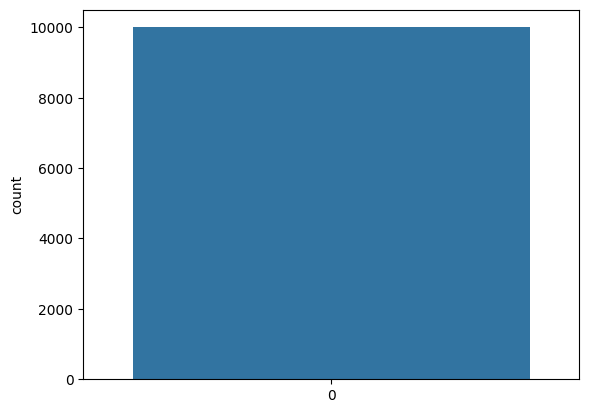

In [ ]:
sns.countplot(data['Exited'])

In [ ]:
x=data.drop('Exited',axis=1)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
y=data['Exited']

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print('Training Shape: ', x_train.shape)
print('Testing Shape: ', x_test.shape)


Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
import numpy as np

y_predict = regression_model.predict(x_test)
y_predict_rounded = np.round(y_predict)

sum = 0
for i, n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1

correct_predictions = np.sum(y_test == y_predict_rounded)
accuracy = correct_predictions / len(y_test)
print(accuracy)

0.813


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ', model.score(x_train, y_train)*100)
print('Testing Accuracy: ', model.score(x_test, y_test)*100)
print('Model Accuracy: ', r2_score(y, model.predict(x))*100)

Training Accuracy:  15.165788953704007
Testing Accuracy:  14.06274648168857
Model Accuracy:  15.070085040267145


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

#Prediction
prediction=regressor.predict(x_test)
prediction1=pd.DataFrame(prediction)
display(prediction1)

,0
0,0.268472
1,0.095945
2,0.318159
3,0.440759
4,0.041641
...,...
995,0.411675
996,0.118545
997,0.154897
998,0.302476


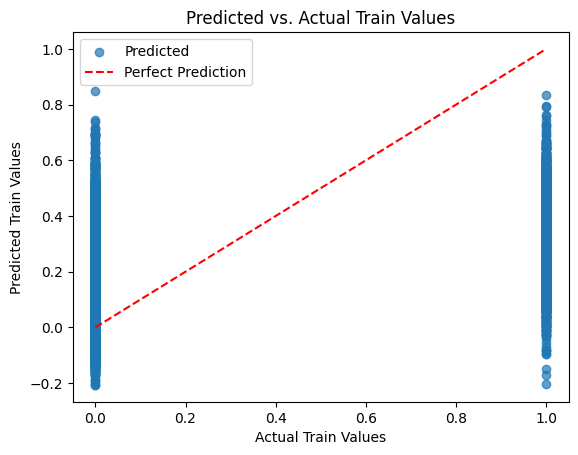

In [ ]:
import matplotlib.pyplot as plt

# Plotting the linear regression line for training data
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()

plt.show()

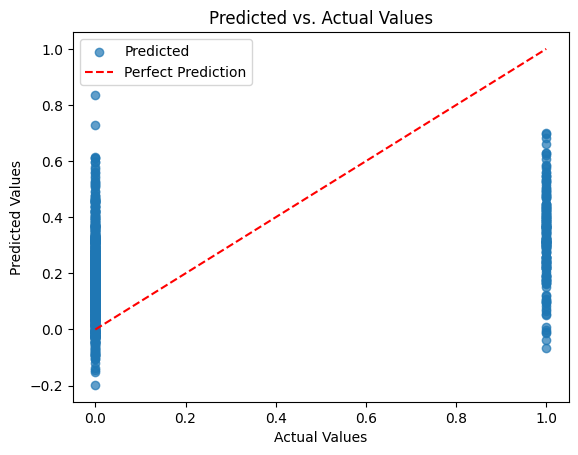

In [ ]:
y_test_pred = model.predict(x_test)

# Plotting the linear regression line
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()

plt.show()

Training Accuracy: 85.84%
Testing Accuracy: 86.20%


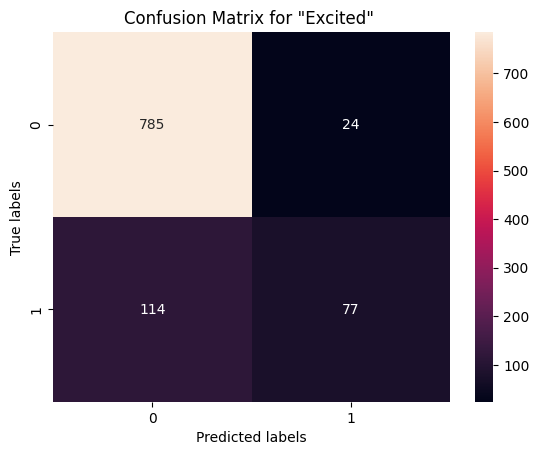

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "Excited" ')
plt.show()

Training Accuracy:  90.5526157093093
Testing Accuracy:  30.136488069428356
Model Accuracy:  84.79837190057526


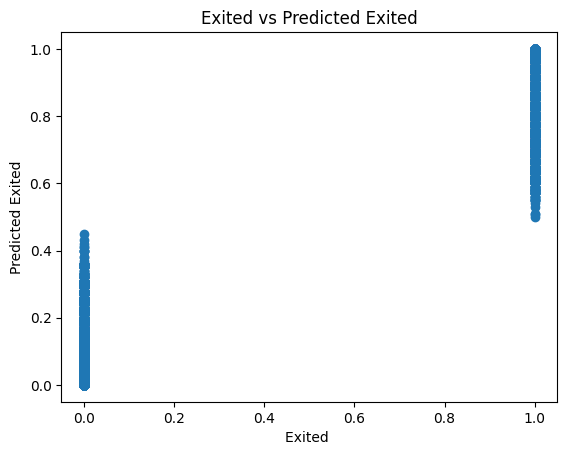

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Exited ")
plt.ylabel("Predicted Exited")
plt.title("Exited vs Predicted Exited")
plt.show()

In [ ]:
pip install xgboost

Training Accuracy:  76.84434334695764
Testing Accuracy:  31.545708253693316
Model Accuracy:  72.53171824315075


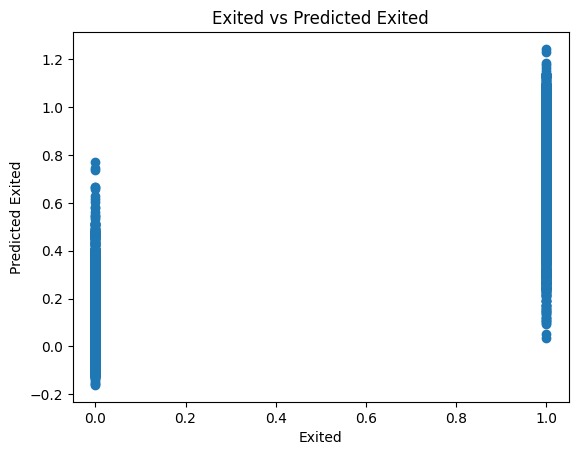

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Exited")
plt.ylabel("Predicted Exited")
plt.title("Exited vs Predicted Exited")
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]

In [ ]:
accuracy = model.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.809


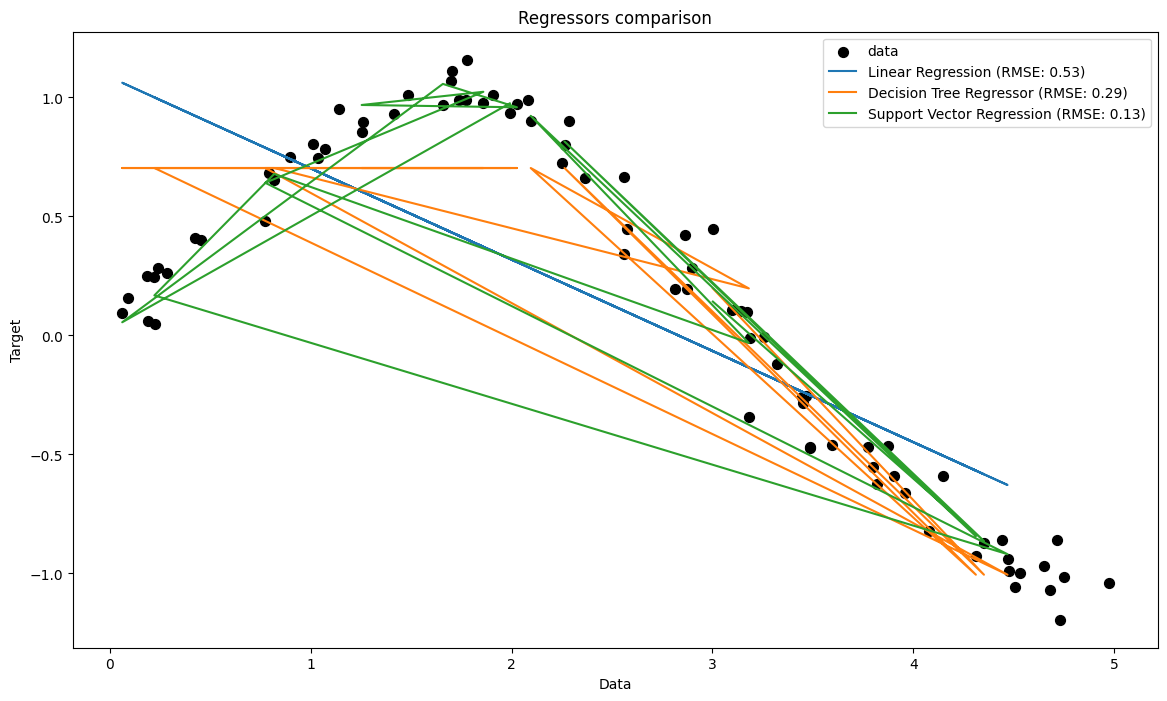

In [ ]:
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
}

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()

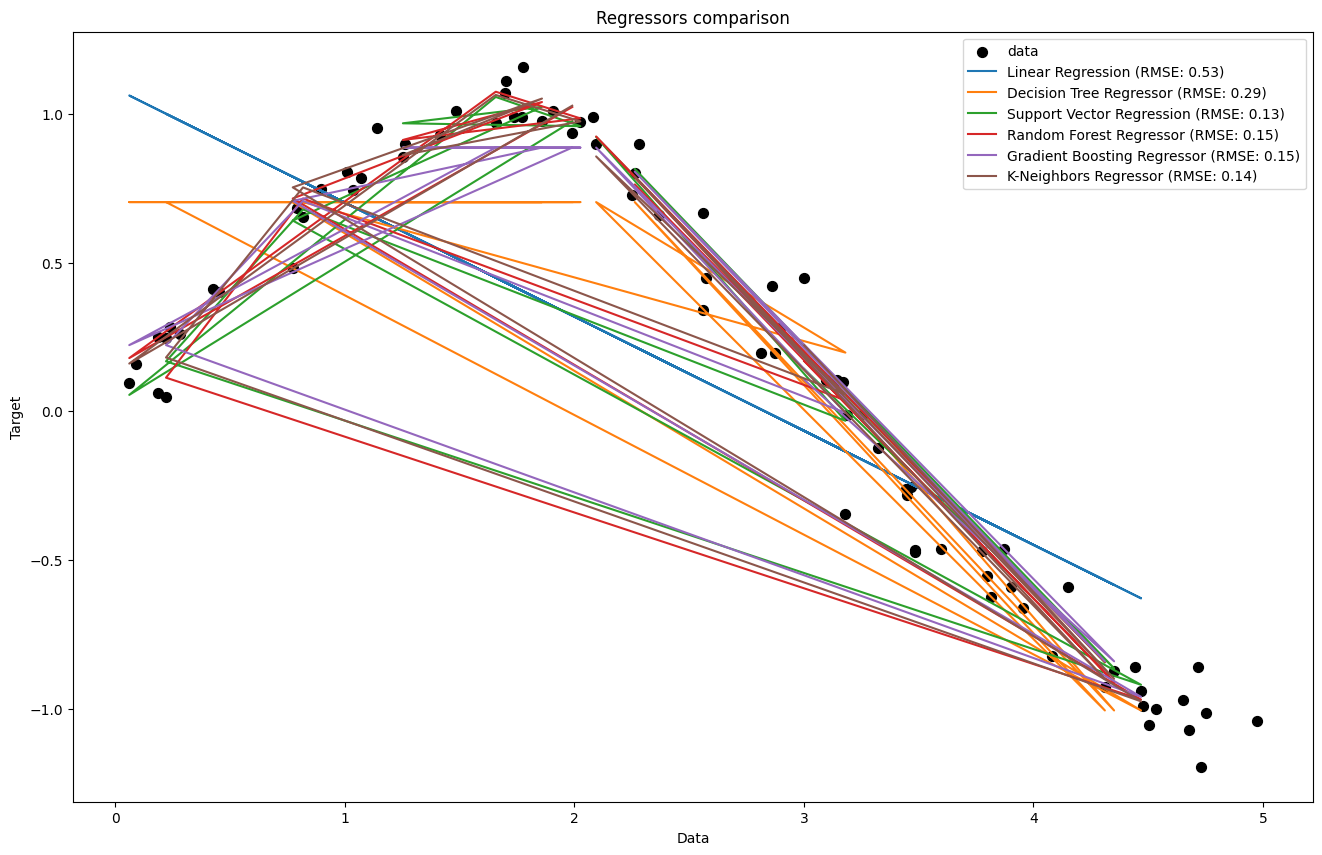

In [ ]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Plotting
plt.figure(figsize=(16, 10))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()